##The aim of this project is to determine the tampering of card using computer vision.

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import matplotlib.pyplot as mplt

###We import the data:
-First we have to create a folder name "card_tamp" in which we will create a second folder name images

In [2]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
#Here we store the originals images
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)
#Here we store the tampered ones

###Now we check some valuables informations such as the format or the size

In [3]:
print("Format, type and size of \"original\": ",[original.format, type(original), original.size])
print("Format and size of \"tampered\": ",[tampered.format, tampered.size])

Format, type and size of "original":  ['JPEG', <class 'PIL.JpegImagePlugin.JpegImageFile'>, (1200, 800)]
Format and size of "tampered":  ['PNG', (282, 179)]


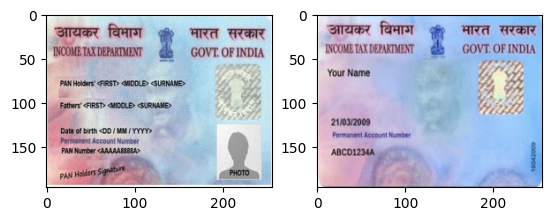

In [9]:
#We visualize the images
mplt.subplot(1, 2, 1)#to  print two images on the same display (mplt.subplot(nrows, ncols, index))
mplt.imshow(original)
mplt.subplot(1, 2, 2)
mplt.imshow(tampered)
mplt.show()

####We will first resize our images to the same size

In [6]:
original= original.resize((256,196))
tampered = tampered.resize((256,196))
print("new size of \"original\" and \"tampered\"", original.size, tampered.size)

new size of "original" and "tampered" (256, 196) (256, 196)


####We now save our image

In [10]:
original.save("/content/card_tamp/Images/original.png")
tampered.save("/content/card_tamp/Images/tampered.png")



####We load them
---



In [11]:
original = cv2.imread("/content/card_tamp/Images/original.png")
tampered = cv2.imread("/content/card_tamp/Images/tampered.png")

####We convert our image to gray now. It makes it easier for the machine to understand them

In [12]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)#turn an image into grayscale
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

####We compute the structural similarity between the two images. The lower it gets,  lower is the similarity between the two images

In [13]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.32610847788255626


#####Since the SSIM is only 32.6%, we can conclude using this metrics that the image are structurally not so similar

####Now we will try to determine the treshold and the countours of each image, in oder to find the difference.
#####NB:  Thresholding is a technique used to separate objects or features in an image from the background. It involves setting a threshold value, and then classifying each pixel as either belonging to the foreground (object) or the background based on whether its intensity is above or below the threshold.For example, in a grayscale image, if a pixel's intensity is greater than the threshold, it might be considered part of an object, while if it's less than the threshold, it might be considered part of the background.

#####In computer vision, contours refer to the boundaries or curves that form the outline of objects in an image. They are a fundamental concept used for object detection, shape analysis, and other image processing tasks.

In [14]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

In [19]:
thresh

array([[  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

####We display the images with their countours

In [ ]:
# loop over the contours
for c in contours:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 1)

#you have a list of contours "contours" obtained from an image a contour-finding function.In the loop, it iterates over each contour c.
#For each contour, it calculates a bounding rectangle using cv2.boundingRect(c). This rectangle contains the (x, y) coordinates of the top-left corner and the width (w) and height (h) of the rectangle that encloses the contour.
#It then draws a red bounding rectangle around the contour on both the original and tampered images using cv2.rectangle(). The (0, 0, 255) argument specifies the color in the format (B, G, R), so it's drawing a red rectangle. The 2 specifies the thickness of the rectangle's border.

Original Format Image


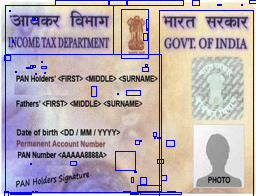

In [26]:
#Diplay original image with contours
print('Original Format Image')
Image.fromarray(original)


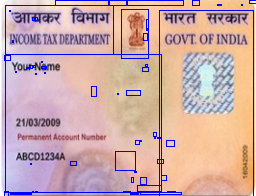

In [27]:
Image.fromarray(tampered)

#####Using the contours, we can say that there isn't much differences between the two images.

Different Image


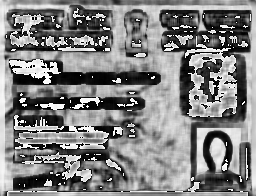

In [28]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


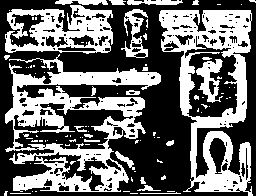

In [29]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

#####Contrary to the contours, we can see that the treshlold and the difference that there are a lot of differences btween those two images.

###In conclusion: this image is tampered